In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('worldwide_coffee_habits.csv')
df

,Country,Year,Coffee Consumption (kg per capita per year),Average Coffee Price (USD per kg),Type of Coffee Consumed,Population (millions)
0,Country_39,2023,9.253939,6.467453,Americano,65.929478
1,Country_29,2011,9.981203,4.346744,Mocha,82.456680
2,Country_15,2020,3.312916,8.767496,Latte,110.938862
3,Country_43,2005,2.436180,11.748750,Espresso,43.137207
4,Country_8,2019,4.637849,8.999099,Mocha,65.484262
...,...,...,...,...,...,...
9995,Country_26,2013,6.107139,11.553694,Mocha,95.808370
9996,Country_22,2013,7.848531,14.844245,Americano,121.098306
9997,Country_31,2019,2.152059,5.516845,Americano,97.327529
9998,Country_43,2012,5.715941,4.641472,Cappuccino,33.916437


In [7]:
df = df.groupby(['Country', 'Year', 'Type of Coffee Consumed']).sum().reset_index()

In [9]:
for country in np.unique(df['Country']):
    for year in np.unique(df['Year']):
        df_selected = df[(df['Country'] == country) & (df['Year'] == year)]
        n_group = len(df_selected)
        i = df_selected.index
        df.loc[i, 'Average Coffee Price (USD per kg)'] = df_selected['Average Coffee Price (USD per kg)'] / n_group

In [52]:
def plot_year_coffee(df, type):
    df_year = df.drop('Country', axis=1).groupby(['Year', 'Type of Coffee Consumed']).sum().reset_index()
    df_coffee_year = df_year[df_year['Type of Coffee Consumed'] == type]
    x, y = df_coffee_year['Year'].values, df_coffee_year['Average Coffee Price (USD per kg)'].values
    plt.plot(x, y, marker='o')
    plt.title(f'Visualization Average Price of {type} based on Year')
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.grid(True)

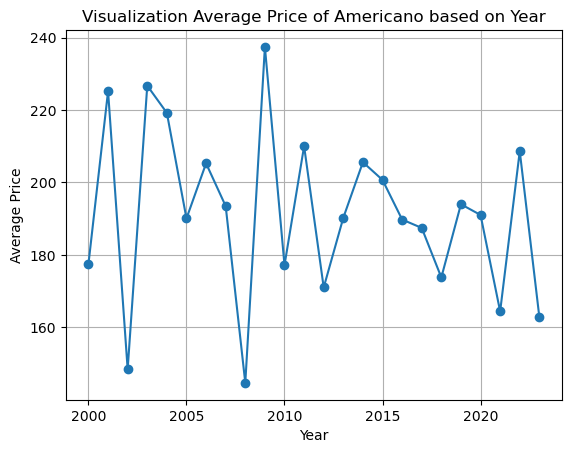

In [53]:
plot_year_coffee(df, 'Americano')

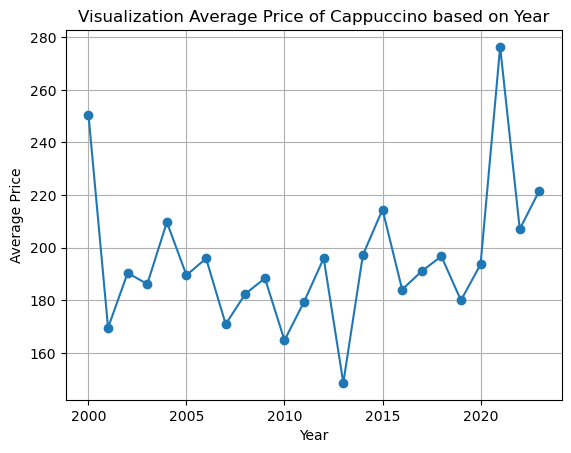

In [ ]:
plot_year_coffee(df, 'Cappuccino')

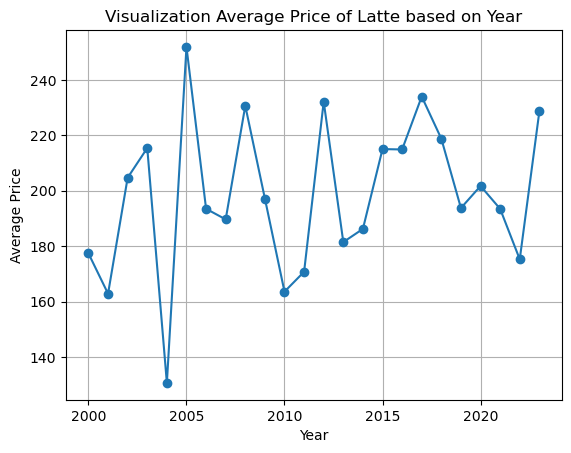

In [54]:
plot_year_coffee(df, 'Latte')

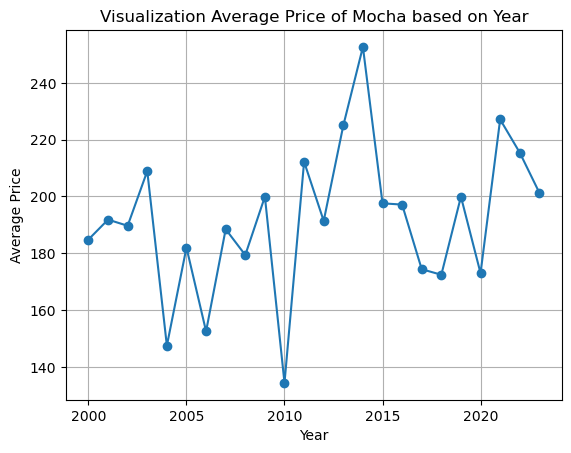

In [58]:
plot_year_coffee(df, 'Mocha')

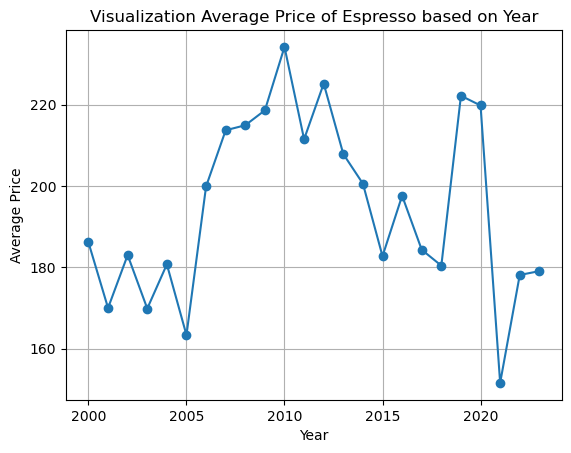

In [59]:
plot_year_coffee(df, 'Espresso')